<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    float64
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    float64
dtypes: float64(7)
memory usage: 14.0 KB

 None

________________________________________________________________
              Date        Open        High         Low       Close   Adj Close  \
0    1.576714e+09   79.463997   81.370003   79.300003   80.807999   80.807999   
1    1.576800e+09   82.057999   82.599998   80.038002   81.117996   81.117996   
2    1.577059e+09   82.356003   84.402000   82.000000   83.844002   83.844002   
3    1.577146e+09   83.671997   85.094002   82.538002   85.050003   85.050003   
4    1.577318e+0

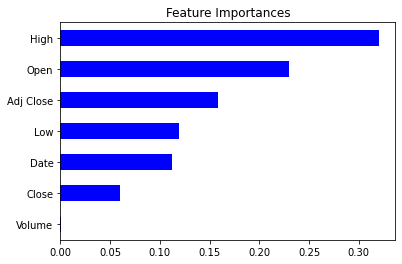

In [77]:
from datetime import datetime
import re
import json
import csv
from io import StringIO
import csvfile as csvfile
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#Declare header names
stock_headers = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Read the data from the csv file
stock_data = read_csv("csvs/TSLA.csv", names=stock_headers)

# print(stock_data)

stock_data['Volume'] = pd.to_numeric(stock_data['Volume'].astype(float))

# check_missing_data = stock_data[stock_data.isna().any(axis=1)]
# print('\nThese are instances with missing data \n', check_missing_data) #print instances with missing data

print("\n",stock_data.info())

stock_data = pd.DataFrame(data=stock_data, columns=stock_headers)

train_headers = ['Date', 'Open', 'Low', 'Close', 'Adj Close', 'Volume']
target_header = ['High']

X = stock_data[train_headers]
y = stock_data[target_header]

# stock_data = stock_data.drop(['High', 'Volume'], axis=1)

#Get the variable which allows us to carry out multiple linear regression
X = stock_data.iloc[:, 0:8]

print("\n________________________________________________________________\n",X,"\n_________________________________________________________________\n")

#Get the high
y = stock_data.iloc[:, 2].values

print("\n________________________________________________________________\n",y,"\n_________________________________________________________________\n")


#split data into 70:30 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#print the dimensions of the train test data set
print("\nThe total of training dataset", X_train.shape)
print("\nThe total of test dataset", X_test.shape)

SEED = 1

#Initialise linear regression model
dt_model = DecisionTreeRegressor(random_state=SEED)

rf_model = RandomForestRegressor(n_estimators=25, random_state=2)

rf_model.fit(X_train, y_train)

#predict model
y_pred = rf_model.predict(X_test)

#predict model on train data
y_pred_train = rf_model.predict(X_train)

#Evaluate evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

#Visualise feature importance
importances = pd.Series(data=rf_model.feature_importances_, index=X_train.columns)

#Sort based on value
importances_sorted = importances.sort_values()

#Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='blue')
plt.title('Feature Importances')
plt.show()

#Printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('R2 score: ', r2)
print('R2_Train score: ', r2_train)

pred_my_value = rf_model.predict([[1577923200.0,46.860001,49.250000,46.630001,49.099998,49.099998,80331100]]) #49.250000 expected High
print("\nThis is the prediction", pred_my_value, "\n")